In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [2]:
te.login('1e9879c059b3474:6hr5wpdewahqbsf')

'Logged with 1e9879c059b3474'

In [3]:
data = te.getHistoricalData(country=['mexico'], indicator=['gdp'], initDate='2015-01-01', output_type='df')
pd.DataFrame(data)

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,Free accounts have access to the following cou...,,2025-03-28T14:21:50.5922273+00:00,0.0000,None,None,None
1,Mexico,GDP,2023-12-31T00:00:00,1789.1144,Yearly,WGDPMEXI,2025-02-21T05:39:00
2,Mexico,GDP,2022-12-31T00:00:00,1464.3127,Yearly,WGDPMEXI,2025-02-21T05:39:00
3,Mexico,GDP,2021-12-31T00:00:00,1316.5695,Yearly,WGDPMEXI,2025-02-21T05:39:00
4,Mexico,GDP,2020-12-31T00:00:00,1121.0648,Yearly,WGDPMEXI,2025-02-21T05:39:00
5,Mexico,GDP,2019-12-31T00:00:00,1304.1062,Yearly,WGDPMEXI,2025-02-21T05:39:00
6,Mexico,GDP,2018-12-31T00:00:00,1256.3002,Yearly,WGDPMEXI,2025-02-21T05:39:00
7,Mexico,GDP,2017-12-31T00:00:00,1190.7215,Yearly,WGDPMEXI,2025-02-21T05:39:00
8,Mexico,GDP,2016-12-31T00:00:00,1112.2335,Yearly,WGDPMEXI,2025-02-21T05:39:00
9,Mexico,GDP,2015-12-31T00:00:00,1213.2945,Yearly,WGDPMEXI,2025-02-21T05:39:00



YoY Growth Rate Summary Statistics:
count     8.000000
mean      5.605815
std      12.139970
min     -14.035774
25%       0.771608
50%       6.282134
75%      12.776172
max      22.181171
Name: YoY_Growth, dtype: float64

Highest YoY Growth: 22.18% (2023)
Lowest YoY Growth: -14.04% (2020)


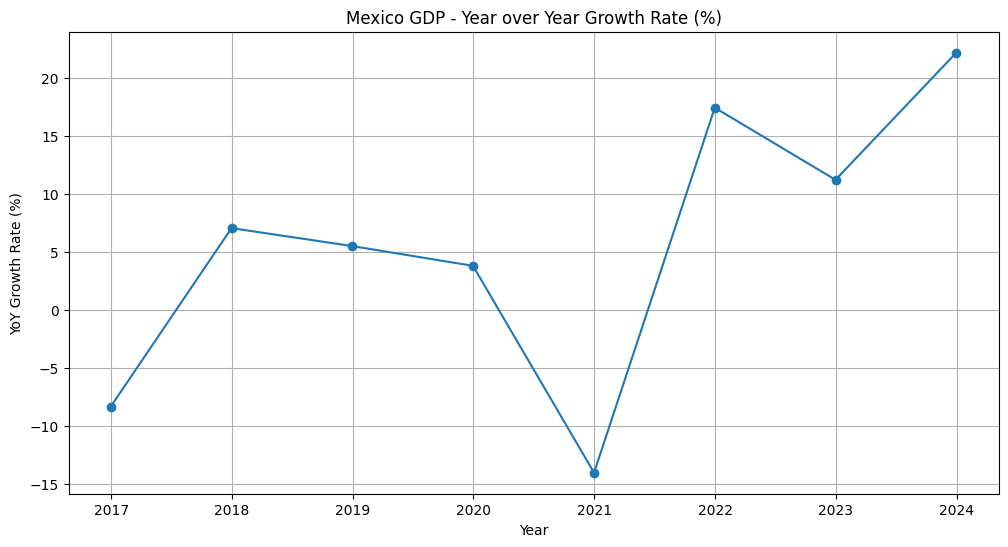

In [4]:
# Clean the data by removing the first row (free account message) and reset index
clean_data = data[data['Country'] == 'Mexico'].copy()
clean_data['DateTime'] = pd.to_datetime(clean_data['DateTime'])
clean_data = clean_data.sort_values('DateTime')

# Calculate YoY growth rate
clean_data['YoY_Growth'] = clean_data['Value'].pct_change() * 100

# Create a new plot
plt.figure(figsize=(12, 6))
plt.plot(clean_data['DateTime'], clean_data['YoY_Growth'], marker='o')
plt.title('Mexico GDP - Year over Year Growth Rate (%)')
plt.xlabel('Year')
plt.ylabel('YoY Growth Rate (%)')
plt.grid(True)

# Print summary statistics
print("\nYoY Growth Rate Summary Statistics:")
print(clean_data['YoY_Growth'].describe())

# Find years with highest and lowest growth
max_growth = clean_data.loc[clean_data['YoY_Growth'].idxmax()]
min_growth = clean_data.loc[clean_data['YoY_Growth'].idxmin()]

print(f"\nHighest YoY Growth: {max_growth['YoY_Growth']:.2f}% ({max_growth['DateTime'].year})")
print(f"Lowest YoY Growth: {min_growth['YoY_Growth']:.2f}% ({min_growth['DateTime'].year})")


R-squared score: 0.8135


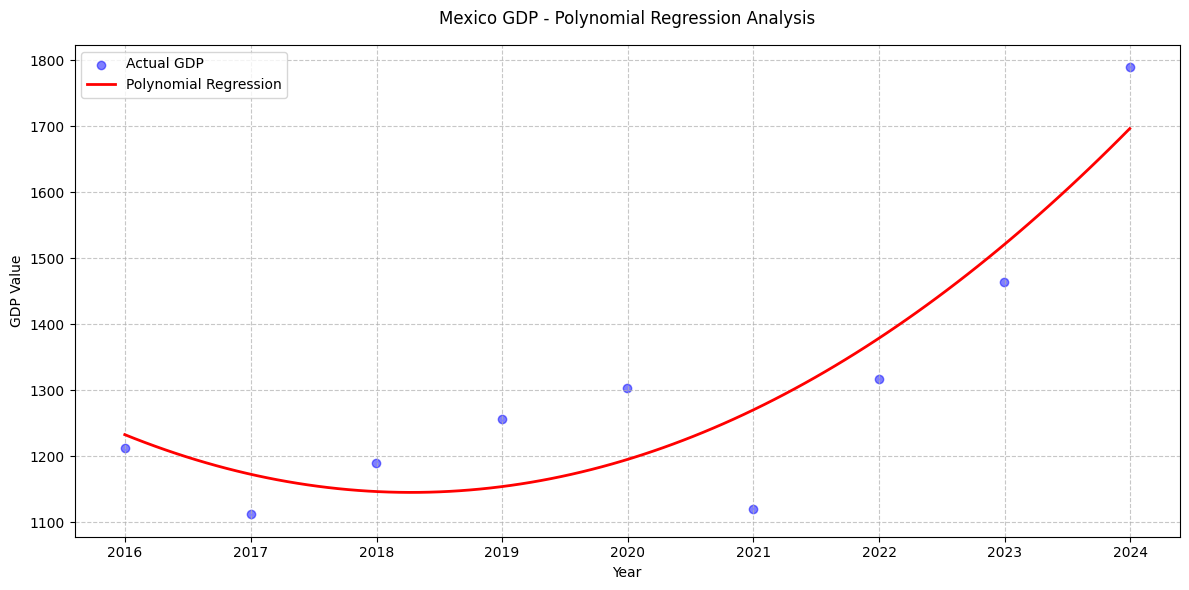

In [ ]:
# Data preparation
X = (clean_data['DateTime'] - clean_data['DateTime'].min()).dt.days.values.reshape(-1, 1)
y = clean_data['Value'].values

# Create and fit polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth prediction curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)#True value here

# Create proper datetime index for smooth curve
smooth_dates = pd.date_range(
    start=clean_data['DateTime'].min(),
    end=clean_data['DateTime'].max(),
    periods=100
)

# Create visualization
plt.figure(figsize=(12, 6))
plt.scatter(clean_data['DateTime'], clean_data['Value'], 
           color='blue', alpha=0.5, label='Actual GDP')
plt.plot(smooth_dates, y_smooth, 'r-', 
         linewidth=2, label='Polynomial Regression')

# Customize plot
plt.title('Mexico GDP - Polynomial Regression Analysis', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GDP Value', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Calculate and display R-squared score
r2_score = model.score(X_poly, y)
print(f"\nR-squared score: {r2_score:.4f}")